In [51]:
import numpy as np
import pandas as pd
import MyLibrary
from MyLibrary import newfunction

In [52]:
import warnings
warnings.filterwarnings('ignore')


In [53]:
# Use pandas to read a csv file by prodiving the path of file to read_csv() function
# Many other formats are available e.g read_excel(), read_table(), read_json etc. 
# these options can be seen using dot tab option
# The output of read_csv function here is stored as a DataFrame
loandata=pd.read_csv(filepath_or_buffer="D:\\Data Scienece\\IVY PRO\\Python\\Python Datasets\\Python Datasets\\external\\l&t\\train.csv"
, 
                              sep=',', encoding='latin-1')

# Controlling data display options
pd.options.display.max_columns=45
pd.set_option('max_rows',2000)
print('Shape before deleting duplicate values:', loandata.shape)

# Removing duplicate rows if any
loandata=loandata.drop_duplicates()
print('Shape After deleting duplicate values:', loandata.shape)

# Printing few records of the data
loandata.head(n=10)

Shape before deleting duplicate values: (233154, 45)
Shape After deleting duplicate values: (233154, 45)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Age in Yrs,Employment.Type,DisbursalDate,Loan Tenure in Yrs,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,AVERAGE.ACCT.AGE in YRS,CREDIT.HISTORY.LENGTH,CREDIT.HISTORY.LENGTH In YRS,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,34.9,Salaried,03-08-2018,0.3,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0.0,0yrs 0mon,0.0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,33.3,Self employed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1.9,1yrs 11mon,1.9,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,33.3,Self employed,01-08-2018,0.3,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0.0,0yrs 0mon,0.0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,24.9,Self employed,26-10-2018,0.1,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,0.7,1yrs 3mon,1.3,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,40.9,Self employed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0.0,0yrs 0mon,0.0,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-1990,28.2,Self employed,19-09-2018,0.2,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,1.8,2yrs 0mon,2.0,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-1988,30.5,Salaried,23-09-2018,0.2,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0.0,0yrs 0mon,0.0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-1989,29.1,Salaried,16-09-2018,0.2,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0.2,0yrs 2mon,0.2,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-1991,27.0,Self employed,05-09-2018,0.2,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4.7,4yrs 8mon,4.7,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-1968,50.5,Salaried,16-09-2018,0.2,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1.6,1yrs 7mon,1.6,0,0


In [54]:
loandata.replace('\s+','',regex=True,inplace=True)
loandata.columns = loandata.columns.str.replace('\s+','',regex=True)


<AxesSubplot:xlabel='loan_default'>

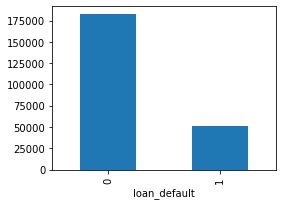

In [55]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=loandata.groupby('loan_default').size() 
GroupedData.plot(kind='bar', figsize=(4,3))

In [56]:
condition1 = loandata['loan_default']==1
subset1=loandata[condition1]
print(len(subset1))
subset1

50611


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,AgeinYrs,Employment.Type,DisbursalDate,LoanTenureinYrs,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTH,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES,loan_default
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,33.3,Selfemployed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,598,I-MediumRisk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs11mon,1.9,1yrs11mon,1.9,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,24.9,Selfemployed,26-10-2018,0.1,6,1998,1,1,0,0,0,0,305,L-VeryHighRisk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs8mon,0.7,1yrs3mon,1.3,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,40.9,Selfemployed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,1,1
10,548567,53278,61230,89.83,67,22807,45,1493,01-01-1979,39.9,Selfemployed,29-09-2018,0.2,6,1998,1,1,0,0,0,0,300,M-VeryHighRisk,1,0,0,0,0,0,0,0,0,0,0,0,2270,0,0,0,0yrs7mon,0.6,0yrs7mon,0.6,0,1
12,478647,53278,61330,89.68,67,22807,45,1497,01-06-1974,44.5,Salaried,30-08-2018,0.3,6,1998,1,0,0,1,0,0,300,M-VeryHighRisk,7,2,1,0,69900,69900,0,0,0,0,0,0,3300,0,0,0,1yrs3mon,1.3,2yrs9mon,2.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233110,650876,56013,77476,74.86,36,15372,45,6553,11-08-1988,30.3,Selfemployed,31-10-2018,0.1,13,2955,1,0,0,0,1,0,615,H-MediumRisk,2,2,0,43821,179300,179300,0,0,0,0,0,0,0,0,0,0,4yrs9mon,4.8,5yrs0mon,5.0,0,1
233120,464969,58759,94557,63.45,101,24031,120,706,01-01-1986,32.9,Selfemployed,25-08-2018,0.3,15,3198,1,1,0,0,0,0,305,L-VeryHighRisk,3,0,0,0,0,0,0,0,0,0,0,0,3704,0,0,0,1yrs8mon,1.7,2yrs0mon,2.0,0,1
233121,615037,57513,74759,78.92,101,24031,120,703,13-03-1983,35.7,Salaried,24-10-2018,0.1,15,3198,1,1,0,0,0,0,537,J-HighRisk,5,0,0,0,0,0,0,0,0,0,0,0,8628,0,0,0,1yrs2mon,1.2,2yrs2mon,2.2,0,1
233122,583720,47849,68027,72.03,101,24031,120,687,10-11-1993,25.0,Salaried,16-10-2018,0.1,15,3198,1,1,0,0,0,0,738,C-VeryLowRisk,1,1,0,4978,9961,9961,0,0,0,0,0,0,1736,0,1,0,0yrs3mon,0.3,0yrs3mon,0.3,0,1


In [57]:
Dataoversample=loandata.append(subset1, ignore_index=False)
Dataoversample

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,AgeinYrs,Employment.Type,DisbursalDate,LoanTenureinYrs,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTH,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,34.9,Salaried,03-08-2018,0.3,6,1998,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,33.3,Selfemployed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,598,I-MediumRisk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs11mon,1.9,1yrs11mon,1.9,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,33.3,Selfemployed,01-08-2018,0.3,6,1998,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,24.9,Selfemployed,26-10-2018,0.1,6,1998,1,1,0,0,0,0,305,L-VeryHighRisk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs8mon,0.7,1yrs3mon,1.3,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,40.9,Selfemployed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233110,650876,56013,77476,74.86,36,15372,45,6553,11-08-1988,30.3,Selfemployed,31-10-2018,0.1,13,2955,1,0,0,0,1,0,615,H-MediumRisk,2,2,0,43821,179300,179300,0,0,0,0,0,0,0,0,0,0,4yrs9mon,4.8,5yrs0mon,5.0,0,1
233120,464969,58759,94557,63.45,101,24031,120,706,01-01-1986,32.9,Selfemployed,25-08-2018,0.3,15,3198,1,1,0,0,0,0,305,L-VeryHighRisk,3,0,0,0,0,0,0,0,0,0,0,0,3704,0,0,0,1yrs8mon,1.7,2yrs0mon,2.0,0,1
233121,615037,57513,74759,78.92,101,24031,120,703,13-03-1983,35.7,Salaried,24-10-2018,0.1,15,3198,1,1,0,0,0,0,537,J-HighRisk,5,0,0,0,0,0,0,0,0,0,0,0,8628,0,0,0,1yrs2mon,1.2,2yrs2mon,2.2,0,1
233122,583720,47849,68027,72.03,101,24031,120,687,10-11-1993,25.0,Salaried,16-10-2018,0.1,15,3198,1,1,0,0,0,0,738,C-VeryLowRisk,1,1,0,4978,9961,9961,0,0,0,0,0,0,1736,0,1,0,0yrs3mon,0.3,0yrs3mon,0.3,0,1


In [58]:
Dataoversample=Dataoversample.append(subset1, ignore_index=False)
Dataoversample

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,AgeinYrs,Employment.Type,DisbursalDate,LoanTenureinYrs,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTH,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,34.9,Salaried,03-08-2018,0.3,6,1998,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,33.3,Selfemployed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,598,I-MediumRisk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs11mon,1.9,1yrs11mon,1.9,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,33.3,Selfemployed,01-08-2018,0.3,6,1998,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,24.9,Selfemployed,26-10-2018,0.1,6,1998,1,1,0,0,0,0,305,L-VeryHighRisk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs8mon,0.7,1yrs3mon,1.3,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,40.9,Selfemployed,26-09-2018,0.2,6,1998,1,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs0mon,0.0,0yrs0mon,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233110,650876,56013,77476,74.86,36,15372,45,6553,11-08-1988,30.3,Selfemployed,31-10-2018,0.1,13,2955,1,0,0,0,1,0,615,H-MediumRisk,2,2,0,43821,179300,179300,0,0,0,0,0,0,0,0,0,0,4yrs9mon,4.8,5yrs0mon,5.0,0,1
233120,464969,58759,94557,63.45,101,24031,120,706,01-01-1986,32.9,Selfemployed,25-08-2018,0.3,15,3198,1,1,0,0,0,0,305,L-VeryHighRisk,3,0,0,0,0,0,0,0,0,0,0,0,3704,0,0,0,1yrs8mon,1.7,2yrs0mon,2.0,0,1
233121,615037,57513,74759,78.92,101,24031,120,703,13-03-1983,35.7,Salaried,24-10-2018,0.1,15,3198,1,1,0,0,0,0,537,J-HighRisk,5,0,0,0,0,0,0,0,0,0,0,0,8628,0,0,0,1yrs2mon,1.2,2yrs2mon,2.2,0,1
233122,583720,47849,68027,72.03,101,24031,120,687,10-11-1993,25.0,Salaried,16-10-2018,0.1,15,3198,1,1,0,0,0,0,738,C-VeryLowRisk,1,1,0,4978,9961,9961,0,0,0,0,0,0,1736,0,1,0,0yrs3mon,0.3,0yrs3mon,0.3,0,1


<AxesSubplot:xlabel='loan_default'>

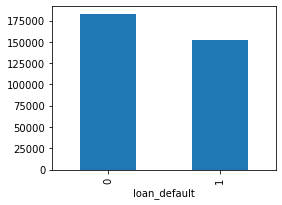

In [59]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=Dataoversample.groupby('loan_default').size() 
GroupedData.plot(kind='bar', figsize=(4,3))

In [60]:
Dataoversample=Dataoversample.drop(columns=['UniqueID','branch_id','supplier_id','manufacturer_id','Current_pincode_ID','Date.of.Birth','Employee_code_ID','DisbursalDate','Employee_code_ID','MobileNo_Avl_Flag','AVERAGE.ACCT.AGE',"CREDIT.HISTORY.LENGTH"])

In [62]:
Dataoversample['Employment.Type'].fillna(Dataoversample['Employment.Type'].mode()[0], inplace=True)

In [71]:
Dataoversample.sample( n=15,
    frac=None,
    replace=False,
    weights=None,
    random_state=91,
    axis=0)

,disbursed_amount,asset_cost,ltv,AgeinYrs,Employment.Type,LoanTenureinYrs,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTHInYRS,NO.OF_INQUIRIES,loan_default
106057,54303,64820,84.85,21.9,Salaried,0.1,1,1,0,0,0,0,738,C-VeryLowRisk,1,1,0,3023,8771,8771,0,0,0,0,0,0,1550,0,1,0,0.3,0.3,0,0
181410,52278,67340,80.49,23.2,Selfemployed,0.3,13,0,0,1,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
149922,55959,70034,81.67,44.3,Selfemployed,0.2,4,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
169177,49763,70408,73.86,22.8,Selfemployed,0.1,3,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
192554,61747,71072,88.92,49.5,Salaried,0.2,8,1,0,0,0,0,682,E-LowRisk,25,4,0,84230,83049,83049,0,0,0,0,0,0,538951,0,2,0,0.4,1.2,0,1
184596,57100,69351,84.99,21.8,Salaried,0.2,9,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
48246,59447,68842,89.33,36.5,Salaried,0.3,5,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
152789,66982,78020,89.72,21.9,Selfemployed,0.2,3,0,0,0,1,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
172909,62713,91060,70.28,23.3,Salaried,0.2,8,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1
85826,51978,63063,87.21,29.3,Selfemployed,0.3,4,1,0,0,0,0,0,NoBureauHistoryAvailable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1


array([[<AxesSubplot:title={'center':'disbursed_amount'}>,
        <AxesSubplot:title={'center':'asset_cost'}>,
        <AxesSubplot:title={'center':'ltv'}>,
        <AxesSubplot:title={'center':'AgeinYrs'}>,
        <AxesSubplot:title={'center':'PERFORM_CNS.SCORE'}>],
       [<AxesSubplot:title={'center':'PRI.NO.OF.ACCTS'}>,
        <AxesSubplot:title={'center':'PRI.ACTIVE.ACCTS'}>,
        <AxesSubplot:title={'center':'PRI.OVERDUE.ACCTS'}>,
        <AxesSubplot:title={'center':'PRI.CURRENT.BALANCE'}>,
        <AxesSubplot:title={'center':'PRI.SANCTIONED.AMOUNT'}>],
       [<AxesSubplot:title={'center':'PRI.DISBURSED.AMOUNT'}>,
        <AxesSubplot:title={'center':'SEC.NO.OF.ACCTS'}>,
        <AxesSubplot:title={'center':'SEC.ACTIVE.ACCTS'}>,
        <AxesSubplot:title={'center':'SEC.OVERDUE.ACCTS'}>,
        <AxesSubplot:title={'center':'SEC.CURRENT.BALANCE'}>],
       [<AxesSubplot:title={'center':'SEC.SANCTIONED.AMOUNT'}>,
        <AxesSubplot:title={'center':'SEC.DISBURSED.AMOUNT'

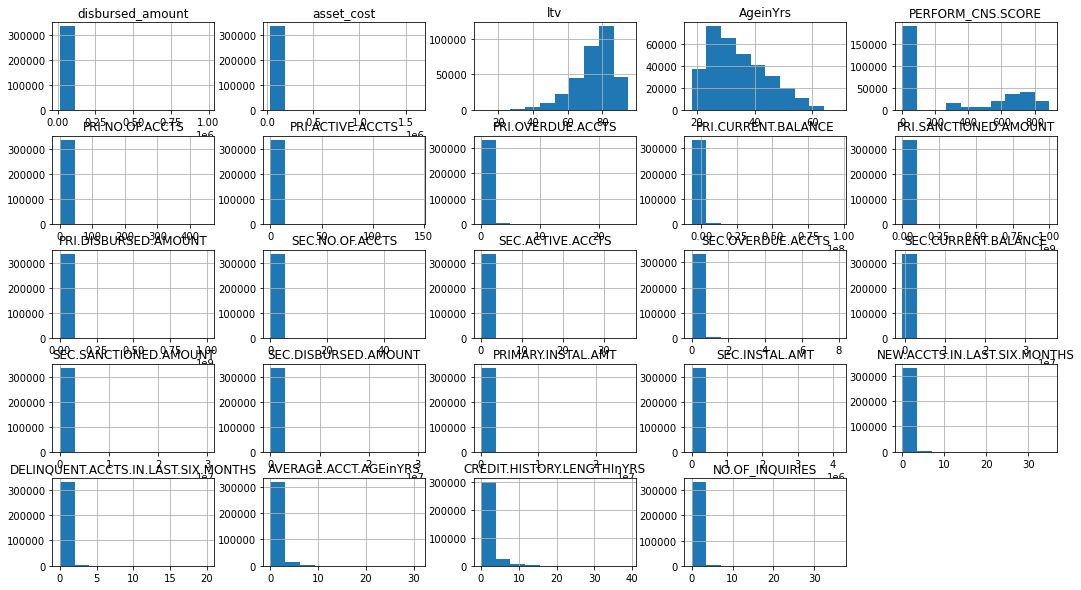

In [34]:
Dataoversample.hist(['disbursed_amount', 'asset_cost', 'ltv', 'AgeinYrs', 
       'PERFORM_CNS.SCORE',
        'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGEinYRS', 'CREDIT.HISTORY.LENGTHInYRS',
       'NO.OF_INQUIRIES'], figsize=(18,10))

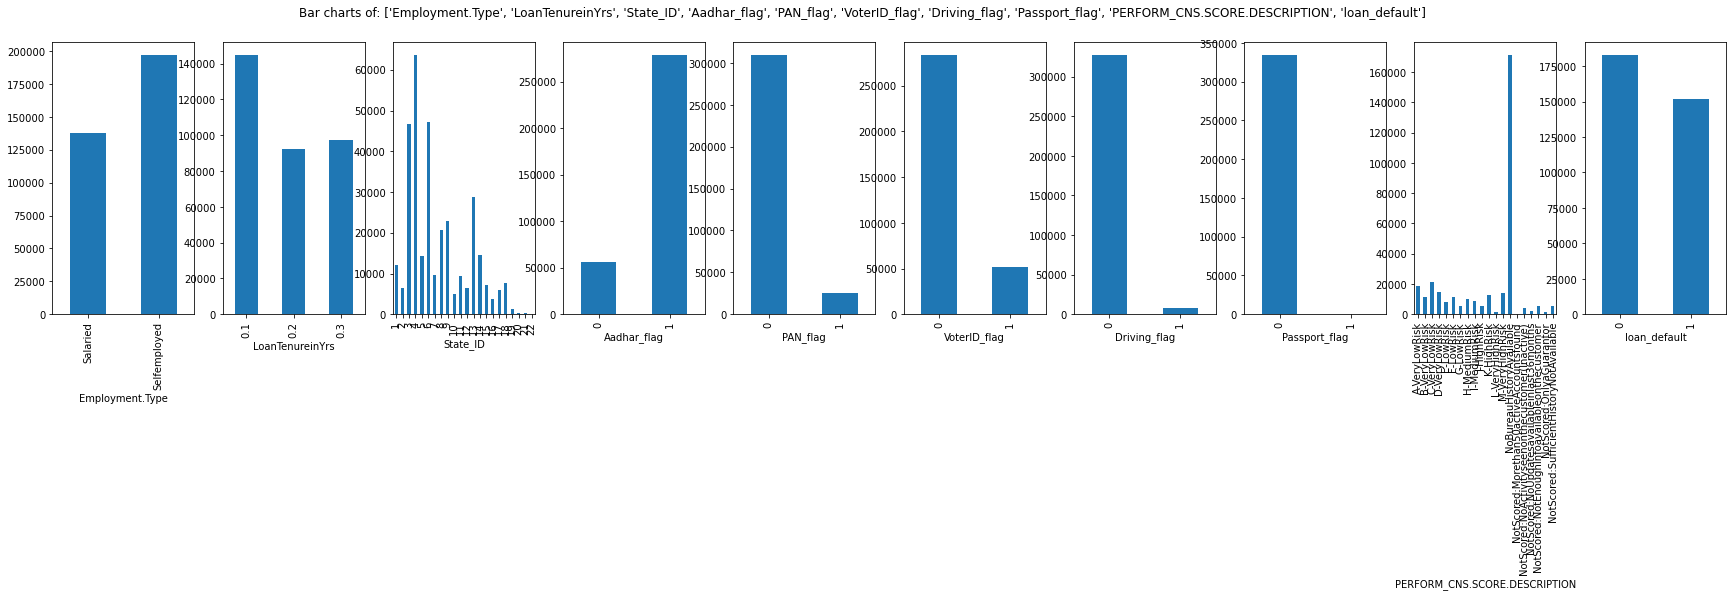

In [67]:
newfunction.PlotBarCharts(inpData=Dataoversample, colsToPlot=['Employment.Type',
       'LoanTenureinYrs', 'State_ID', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 
       'PERFORM_CNS.SCORE.DESCRIPTION','loan_default'])

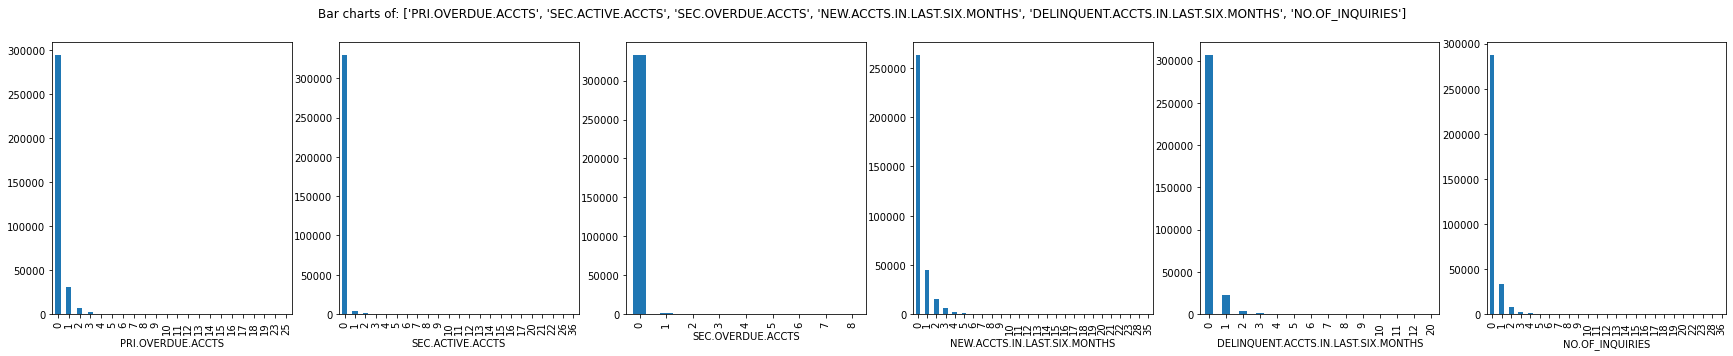

In [66]:
newfunction.PlotBarCharts(inpData=Dataoversample, colsToPlot=[ 
        
       'PRI.OVERDUE.ACCTS',  'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       
       'NO.OF_INQUIRIES', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 
       'PERFORM_CNS.SCORE.DESCRIPTION'])

In [70]:
ContinuousPredictorList=['disbursed_amount', 'asset_cost', 'ltv', 
       'PERFORM_CNS.SCORE',
        'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 
       
                         'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       
       'AVERAGE.ACCT.AGEinYRS', 'CREDIT.HISTORY.LENGTHInYRS',
       ]
newfunction.FunctionAnovaCat(inpData=Dataoversample, TargetVariable='loan_default', ContinuousPredictorList=ContinuousPredictorList)

##### ANOVA Results ##### 

disbursed_amount is correlated with loan_default | P-Value: 0.0
asset_cost is correlated with loan_default | P-Value: 1.4982469606744228e-23
ltv is correlated with loan_default | P-Value: 0.0
PERFORM_CNS.SCORE is correlated with loan_default | P-Value: 0.0
PRI.NO.OF.ACCTS is correlated with loan_default | P-Value: 4.2248381253830976e-138
PRI.ACTIVE.ACCTS is correlated with loan_default | P-Value: 8.209201230815021e-200
PRI.CURRENT.BALANCE is correlated with loan_default | P-Value: 5.497677265389956e-93
PRI.SANCTIONED.AMOUNT is correlated with loan_default | P-Value: 3.867466065365677e-09
PRI.DISBURSED.AMOUNT is correlated with loan_default | P-Value: 6.045776274801586e-09
SEC.NO.OF.ACCTS is correlated with loan_default | P-Value: 8.614895557755698e-10
SEC.CURRENT.BALANCE is correlated with loan_default | P-Value: 1.8715518181865997e-05
SEC.SANCTIONED.AMOUNT is correlated with loan_default | P-Value: 1.5157673949851506e-06
SEC.DISBURSED.AMOUNT is correlated w

['disbursed_amount',
 'asset_cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'AVERAGE.ACCT.AGEinYRS',
 'CREDIT.HISTORY.LENGTHInYRS']

In [74]:
CategoricalColsList=['Employment.Type',
        'State_ID'
       ]

# Calling the function
MyLibrary.newfunction.FunctionChisq( inpData=Dataoversample,
    TargetVariable='loan_default',
    CategoricalVariablesList=CategoricalColsList)

Employment.Type is correlated with loan_default | P-Value: 4.443766006092357e-86
State_ID is correlated with loan_default | P-Value: 0.0


['Employment.Type', 'State_ID']

In [171]:
SelectedColumns=[
 'ltv',
 'PERFORM_CNS.SCORE',
  'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGEinYRS',
 'CREDIT.HISTORY.LENGTHInYRS',
        ]

# Selecting final columns
DataForML=Dataoversample[SelectedColumns]
DataForML.head()

,ltv,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTHInYRS
0,89.55,0,0,0,0.0,0.0
1,73.23,598,0,1,1.9,1.9
2,89.63,0,0,0,0.0,0.0
3,88.48,305,0,0,0.7,1.3
4,88.39,0,0,0,0.0,0.0


In [92]:
#DataForML['Employment.Type'].replace({'Salaried':0,'Selfemployed':1}, inplace=True)

In [172]:
# Treating all the nominal variables at once using dummy variables
DataForMLfinalnew=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForMLfinalnew['loan_default']=Dataoversample['loan_default']

# Printing sample rows
print(DataForMLfinalnew.shape)
DataForMLfinalnew.head()

(334376, 7)


,ltv,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTHInYRS,loan_default
0,89.55,0,0,0,0.0,0.0,0
1,73.23,598,0,1,1.9,1.9,1
2,89.63,0,0,0,0.0,0.0,0
3,88.48,305,0,0,0.7,1.3,1
4,88.39,0,0,0,0.0,0.0,1


In [173]:
# Keeping the target variable for future reference
TargetVariable=DataForMLfinalnew['loan_default']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=DataForMLfinalnew.drop( 'loan_default', axis=1)
      


print(OnlyPredictors.shape)
OnlyPredictors.head()


(334376, 6)


,ltv,PERFORM_CNS.SCORE,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGEinYRS,CREDIT.HISTORY.LENGTHInYRS
0,89.55,0,0,0,0.0,0.0
1,73.23,598,0,1,1.9,1.9
2,89.63,0,0,0,0.0,0.0
3,88.48,305,0,0,0.7,1.3
4,88.39,0,0,0,0.0,0.0


In [174]:
# Extracting the target variable array y and Predictor variables array X
y = TargetVariable.values
X = OnlyPredictors.values


# Printing top 10 sample values
#print(X[0:10])
#print(y[0:10])

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

print(X[0:2])
print(y[0:2])

[[0.93585972 0.         0.         0.         0.         0.        ]
 [0.74379193 0.67191011 0.         0.05       0.06168831 0.04871795]]
[0 1]


In [85]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [175]:
# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=6)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 49 Principal components present in reduced_X
print(np.round(reduced_X[0:4],2))

[[-0.31 -0.18 -0.01 -0.   -0.   -0.  ]
 [ 0.36  0.04  0.   -0.02  0.04  0.03]
 [-0.31 -0.18 -0.01 -0.   -0.   -0.  ]
 [ 0.03 -0.15 -0.   -0.01 -0.   -0.01]]


In [176]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 92% and 5% variance of data respectively

[0.86 0.1  0.02 0.   0.   0.  ]


In [177]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 86.46  96.96  99.17  99.61  99.83 100.01]


Text(0, 0.5, '% Variance explained')

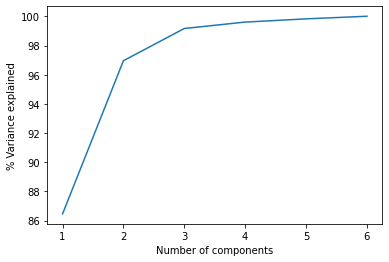

In [178]:
plt.plot( range(1,7), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [183]:
# Choosing 3-principal components based on above graph
pca = PCA(n_components=6)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# Four Columns present in X are now represented by 3-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-0.31 -0.18 -0.01 -0.   -0.   -0.  ]
 [ 0.36  0.04  0.   -0.02  0.04  0.03]
 [-0.31 -0.18 -0.01 -0.   -0.   -0.  ]
 [ 0.03 -0.15 -0.   -0.01 -0.   -0.01]
 [-0.31 -0.16 -0.01 -0.   -0.   -0.  ]
 [ 0.62 -0.15 -0.02 -0.03 -0.    0.  ]
 [-0.31 -0.02 -0.01 -0.   -0.   -0.  ]
 [-0.3   0.03 -0.01 -0.   -0.   -0.  ]
 [ 0.51 -0.15  0.09 -0.05 -0.02  0.04]
 [ 0.61 -0.12 -0.04 -0.03 -0.    0.  ]]


In [185]:
Reduceddata=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3','PC4','PC5','PC6'
])
Reduceddata['loan_default']=y
Reduceddata.head()

,PC1,PC2,PC3,PC4,PC5,PC6,loan_default
0,-0.310050,-0.175979,-0.012040,-0.004690,-0.000452,-0.002372,0
1,0.360064,0.036505,0.002592,-0.015495,0.041064,0.025473,1
2,-0.310021,-0.176920,-0.012041,-0.004702,-0.000453,-0.002372,0
3,0.034256,-0.152887,-0.003829,-0.012850,-0.001213,-0.006008,1
4,-0.310462,-0.162335,-0.012013,-0.004510,-0.000434,-0.002376,1


In [186]:
OriginalDatanew=pca_fit.inverse_transform(reduced_X)
print(np.round(OriginalDatanew[0:2],2))

[[ 0.94 -0.    0.   -0.   -0.   -0.  ]
 [ 0.74  0.67 -0.    0.05  0.06  0.05]]


In [187]:
print(np.round(X[0:2],2))

[[0.94 0.   0.   0.   0.   0.  ]
 [0.74 0.67 0.   0.05 0.06 0.05]]


In [188]:
# Separate Target Variable and Predictor Variables
TargetVariable='loan_default'
Predictors=['PC1','PC2','PC3','PC4','PC5','PC6'
]


X2=Reduceddata[Predictors].values
y2=Reduceddata[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=67)

In [169]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(234063, 10)
(234063,)
(100313, 10)
(100313,)


In [189]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
#LOG=clf.fit(X_trainres,y_trainres)
prediction=LOG.predict(X_test)


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(LOG, X2 , y2, cv=10, scoring='f1_weighted')
Accuracy_Values=cross_val_score(LOG, X2, y2, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print('\n##### Model Validation  ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].sample(n=20,
    frac=None,
    replace=False,
    weights=None,
    random_state=67,
    axis=0))

              precision    recall  f1-score   support

           0       0.59      0.73      0.65     54810
           1       0.55      0.39      0.45     45503

    accuracy                           0.58    100313
   macro avg       0.57      0.56      0.55    100313
weighted avg       0.57      0.58      0.56    100313

[[40031 27785]
 [14779 17718]]
Accuracy of the model on Testing Sample Data: 0.56

Accuracy values for 10-fold Cross Validation:
 [0.56175545 0.57453828 0.57486422 0.54801218 0.56886686 0.56556582
 0.55221781 0.55056155 0.5593965  0.56465289]

Final Average Accuracy of the model: 0.56

##### Model Validation  ##########
       loan_default  Predictedloan_default
62408             1                      0
4294              0                      1
78815             1                      0
87398             0                      0
38577             0                      0
73987             1                      1
25912             1                      0
62559  